In [1]:
import numpy as np
from utils.plot_utils import *
import matplotlib.pyplot as plt

From [10.1007](https://link.springer.com/article/10.1007/s00362-012-0429-2) the ratio of two normally distributed variables X and Y, e.g. Z=X/Y, can be modelled by a normal distribution if the coefficient of variation of Y, i.e. $\sigma_Y/\mu_Y$, is smaller than 0.1.

In [2]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [3]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(1e7)
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

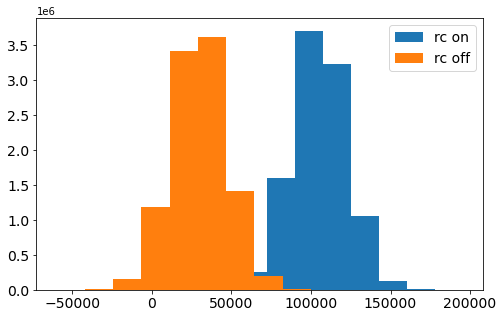

In [4]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(o, label = 'rc on')
ax.hist(c, label = 'rc off')
ax.legend(fontsize = 14)
set_fontsize(ax,14)

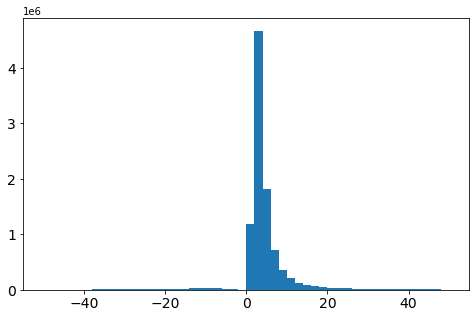

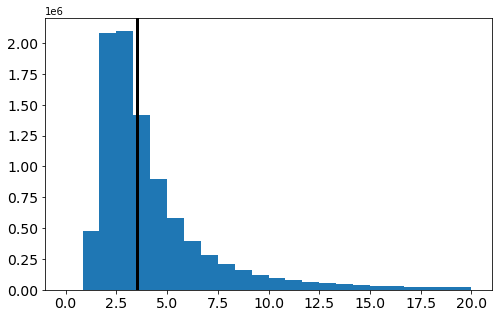

In [5]:
r = o/c
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r, bins = np.linspace(-50,50,51))
set_fontsize(ax, 14)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r, bins = np.linspace(0,20,25))
set_fontsize(ax, 14)
ax.axvline(ratio, lw = 3, color = 'k')

In [6]:
print(f'mean : {r.mean():.3f}; median {np.median(r):.3f}')

mean : 4.105; median 3.310


### Now assuming I take 50 shots on one location, and a total of 4000 shots

In [7]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(4000)
nbunched = 50
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

In [8]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

In [9]:
mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

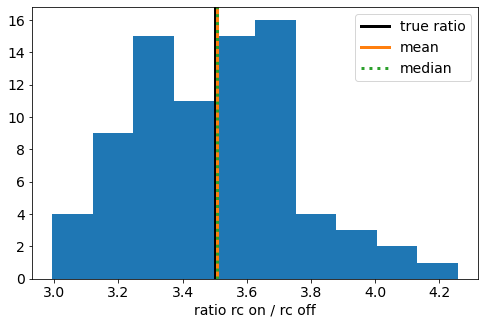

In [10]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r)
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(r.mean(), lw = 3, color = 'C2', ls = 'dotted', label = 'median')
ax.legend(fontsize = 14)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [11]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')

mean : 3.506; median : 3.508; std : 0.251; std of mean : 0.028


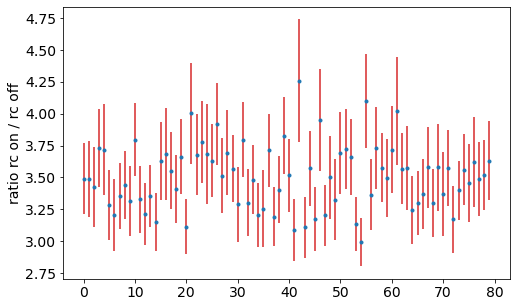

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [13]:
rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r)):.3f}')

weigthed states -> mean : 3.444; std : 0.240; std of mean : 0.027


### Bunch less shots together, e.g. 10

In [14]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(4000)
nbunched = 10
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

In [15]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

In [16]:
mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

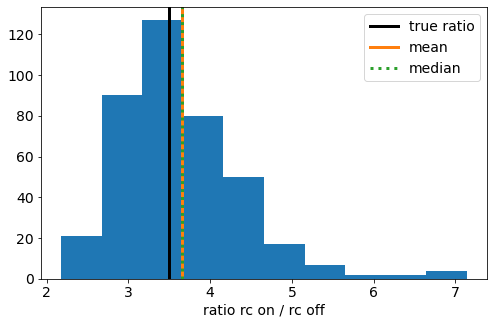

In [17]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r)
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(r.mean(), lw = 3, color = 'C2', ls = 'dotted', label = 'median')
ax.legend(fontsize = 14)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [18]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')

mean : 3.651; median : 3.543; std : 0.768; std of mean : 0.038


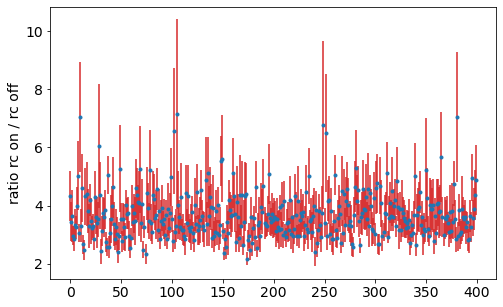

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [20]:
rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r)):.3f}')

weigthed states -> mean : 3.230; std : 0.552; std of mean : 0.028
